# Predictive Modeling For Crop Yield Estimation: Machine Learning Classifier Comparision


In [1]:
#importing dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import os
from sklearn.linear_model import OrthogonalMatchingPursuit

In [3]:
#uploading dataset

In [4]:
df = pd.read_csv(r'datasets\dataset.csv')

In [5]:
df.head()


,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,yield_class
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37,average yield
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37,average yield
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37,low yield
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37,low yield
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37,low yield


In [6]:
#data analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 9 columns):
Unnamed: 0                       28242 non-null int64
Area                             28242 non-null object
Item                             28242 non-null object
Year                             28242 non-null int64
hg/ha_yield                      28242 non-null int64
average_rain_fall_mm_per_year    28242 non-null float64
pesticides_tonnes                28242 non-null float64
avg_temp                         28242 non-null float64
yield_class                      28242 non-null object
dtypes: float64(3), int64(3), object(3)
memory usage: 1.9+ MB


In [8]:
df.describe()

,Unnamed: 0,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,14120.500000,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,8152.907488,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,0.000000,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,7060.250000,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,14120.500000,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,21180.750000,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,28241.000000,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [9]:
#data Correlection

In [10]:
df.corr()

,Unnamed: 0,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
Unnamed: 0,1.000000,0.043850,0.013395,-0.228755,-0.316017,-0.051584
Year,0.043850,1.000000,0.091630,-0.003798,0.140930,0.014409
hg/ha_yield,0.013395,0.091630,1.000000,0.000962,0.064085,-0.114777
average_rain_fall_mm_per_year,-0.228755,-0.003798,0.000962,1.000000,0.180984,0.313040
pesticides_tonnes,-0.316017,0.140930,0.064085,0.180984,1.000000,0.030946
avg_temp,-0.051584,0.014409,-0.114777,0.313040,0.030946,1.000000


In [11]:
#Checking NULL values

In [12]:
df.isnull().sum()

Unnamed: 0                       0
Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
yield_class                      0
dtype: int64

In [13]:
df = df.drop(['Unnamed: 0'], axis = 1)
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,yield_class
0,Albania,Maize,1990,36613,1485.0,121.00,16.37,average yield
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37,average yield
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37,low yield
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37,low yield
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37,low yield
...,...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76,low yield
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76,low yield
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76,low yield
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76,low yield


In [14]:
labels = df['yield_class'].unique()
labels

array(['average yield', 'low yield', 'high yield'], dtype=object)

In [15]:
Labels = ['Area','Item','yield_class']

for i in Labels:
    df[i] = LabelEncoder().fit_transform(df[i])
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,yield_class
0,0,1,1990,36613,1485.0,121.00,16.37,0
1,0,3,1990,66667,1485.0,121.00,16.37,0
2,0,4,1990,23333,1485.0,121.00,16.37,2
3,0,5,1990,12500,1485.0,121.00,16.37,2
4,0,6,1990,7000,1485.0,121.00,16.37,2
...,...,...,...,...,...,...,...,...
28237,100,4,2013,22581,657.0,2550.07,19.76,2
28238,100,5,2013,3066,657.0,2550.07,19.76,2
28239,100,6,2013,13142,657.0,2550.07,19.76,2
28240,100,7,2013,22222,657.0,2550.07,19.76,2


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
Area                             28242 non-null int32
Item                             28242 non-null int32
Year                             28242 non-null int64
hg/ha_yield                      28242 non-null int64
average_rain_fall_mm_per_year    28242 non-null float64
pesticides_tonnes                28242 non-null float64
avg_temp                         28242 non-null float64
yield_class                      28242 non-null int32
dtypes: float64(3), int32(3), int64(2)
memory usage: 1.4 MB


In [17]:
#Data Visulazation

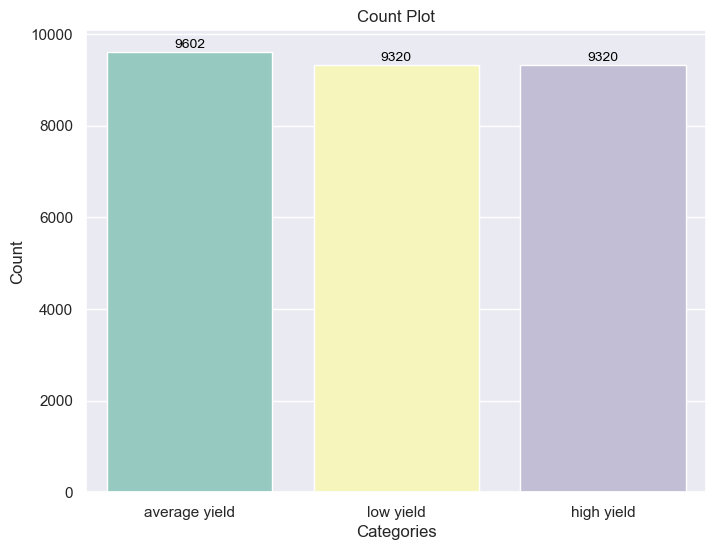

In [18]:
sns.set(style="darkgrid") 
plt.figure(figsize=(8, 6)) 
ax = sns.countplot(x=df['yield_class'], data=df, palette="Set3")
plt.title("Count Plot")  
plt.xlabel("Categories") 
plt.ylabel("Count") 

ax.set_xticklabels(labels)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()  

In [19]:
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,yield_class
0,0,1,1990,36613,1485.0,121.00,16.37,0
1,0,3,1990,66667,1485.0,121.00,16.37,0
2,0,4,1990,23333,1485.0,121.00,16.37,2
3,0,5,1990,12500,1485.0,121.00,16.37,2
4,0,6,1990,7000,1485.0,121.00,16.37,2
...,...,...,...,...,...,...,...,...
28237,100,4,2013,22581,657.0,2550.07,19.76,2
28238,100,5,2013,3066,657.0,2550.07,19.76,2
28239,100,6,2013,13142,657.0,2550.07,19.76,2
28240,100,7,2013,22222,657.0,2550.07,19.76,2


In [20]:
#Declaring independent and dependent variable

In [21]:
x = df.drop(['yield_class'],axis = 1)
x.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,1,1990,36613,1485.0,121.0,16.37
1,0,3,1990,66667,1485.0,121.0,16.37
2,0,4,1990,23333,1485.0,121.0,16.37
3,0,5,1990,12500,1485.0,121.0,16.37
4,0,6,1990,7000,1485.0,121.0,16.37


In [22]:
y = df['yield_class']
y

0        0
1        0
2        2
3        2
4        2
        ..
28237    2
28238    2
28239    2
28240    2
28241    2
Name: yield_class, Length: 28242, dtype: int32

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state = 42)

In [24]:
x_train.shape

(22593, 7)

In [25]:
y_train.shape

(22593,)

In [26]:
#performance evalution

In [27]:
precision = []
recall = []
fscore = []
accuracy = []


def performance_metrics(algorithm, predict, testY):
    testY = testY.astype('int')
    predict = predict.astype('int')
    p = precision_score(testY, predict,average='macro',zero_division=1) * 100
    r = recall_score(testY, predict,average='macro',zero_division=1) * 100
    f = f1_score(testY, predict,average='macro',zero_division=1) * 100
    a = accuracy_score(testY,predict)*100 
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    print(algorithm+' Accuracy    : '+str(a))
    print(algorithm+' Precision   : '+str(p))
    print(algorithm+' Recall      : '+str(r))
    print(algorithm+' FSCORE      : '+str(f))
    report=classification_report(predict, testY,target_names=labels,zero_division=1)
    print('\n',algorithm+" classification report\n",report)
    conf_matrix = confusion_matrix(testY, predict) 
    plt.figure(figsize =(5, 5)) 
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="Blues" ,fmt ="g");
    ax.set_ylim([0,len(labels)])
    plt.title(algorithm+" Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show()

In [28]:
# OMP Classifier model building

c:\users\bhadr\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator OrthogonalMatchingPursuit from version 1.0.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


Orthogonal Matching Pursuit Classifier Accuracy    : 34.961940166401135
Orthogonal Matching Pursuit Classifier Precision   : 56.727429082227275
Orthogonal Matching Pursuit Classifier Recall      : 35.01682729967987
Orthogonal Matching Pursuit Classifier FSCORE      : 28.02083691327409

 Orthogonal Matching Pursuit Classifier classification report
                precision    recall  f1-score   support

average yield       0.53      0.37      0.44      2670
    low yield       0.52      0.33      0.40      2979
   high yield       0.00      1.00      0.00         0

     accuracy                           0.35      5649
    macro avg       0.35      0.57      0.28      5649
 weighted avg       0.53      0.35      0.42      5649



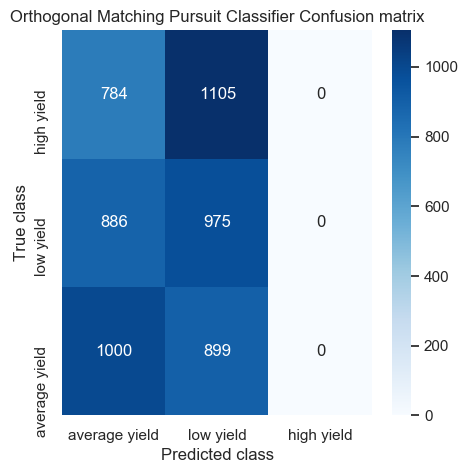

In [29]:
omp_model_path = 'model/OMPClassifier.npy'
if os.path.exists(omp_model_path):
    # Load the OMP Classifier model
    omp_classifier = np.load(omp_model_path, allow_pickle=True).item()
else:                       
    # Train and save the OMP Classifier model
    omp_classifier = OrthogonalMatchingPursuit()
    omp_classifier.fit(x_train, y_train)
    np.save(omp_model_path, omp_classifier)

# Predict using the trained OMP Classifier model
y_pred_omp = omp_classifier.predict(x_test)

# Evaluate the OMP Classifier model
performance_metrics('Orthogonal Matching Pursuit Classifier', y_pred_omp, y_test)

In [30]:
#Calibrated ClassifierCV model building

In [31]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression

calibrated_model_path = 'model/CalibratedClassifier.npy'
if os.path.exists(calibrated_model_path):
    calibrated_classifier = np.load(calibrated_model_path, allow_pickle=True).item()
else:                       
    base_classifier = LogisticRegression()  
    calibrated_classifier =CalibratedClassifierCV(base_classifier, method='sigmoid')  # Use 'sigmoid' or 'isotonic'
    calibrated_classifier.fit(x_train, y_train)
    np.save(calibrated_model_path,calibrated_classifier)

y_pred_calibrated =calibrated_classifier.predict(x_test)

performance_metrics('CalibratedClassifier', y_pred_calibrated, y_test)

c:\users\bhadr\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
c:\users\bhadr\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator _SigmoidCalibration from version 1.0.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
c:\users\bhadr\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator CalibratedClassifierCV from version 1.0.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


AttributeError: '_CalibratedClassifier' object has no attribute 'classes_'

In [32]:
#Tabular form of Performance Metrics

In [33]:
#showing all algorithms performance values
columns = ["Algorithm Name","Precison","Recall","FScore","Accuracy"]
values = []
algorithm_names = ["Passive Aggressive Classifier", "Calibrated ClassifierCV"]
for i in range(len(algorithm_names)):
    values.append([algorithm_names[i],precision[i],recall[i],fscore[i],accuracy[i]])
    
temp = pd.DataFrame(values,columns=columns)
temp

IndexError: list index out of range

In [34]:
#Uploading testing dataset

In [35]:
test=pd.read_csv("test.csv")
test

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Wheat,1991,20698,1485,121,15.36
1,Albania,Maize,1992,24876,1485,121,16.06
2,Albania,Potatoes,1992,82920,1485,121,16.06
3,Albania,"Rice, paddy",1992,40000,1485,121,16.06
4,Albania,Sorghum,1992,3747,1485,121,16.06


In [36]:
Test_Labels = ['Area','Item']

for i in Test_Labels:
    test[i] = LabelEncoder().fit_transform(test[i])
test

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,4,1991,20698,1485,121,15.36
1,0,0,1992,24876,1485,121,16.06
2,0,1,1992,82920,1485,121,16.06
3,0,2,1992,40000,1485,121,16.06
4,0,3,1992,3747,1485,121,16.06


In [37]:
#Model prediction on test data

In [39]:
predict = calibrated_classifier.predict(test)

for i, p in enumerate(predict):
    if p == 0:
        print(test.iloc[i]) 
        print("Model Predicted of Row {} Test Data is--->".format(i),labels[0])
    elif p == 1:
        print(test.iloc[i])  
        print("Model Predicted of Row {} Test Data is--->".format(i),labels[1])
    elif p == 2:
        print(test.iloc[i])  
        print("Model Predicted of Row {} Test Data is--->".format(i),labels[2])
        

AttributeError: '_CalibratedClassifier' object has no attribute 'classes_'